# ReThink Media Twitter API: Tutorial and Examples

This notebook will provide a user manual and example use cases for using ReThink Media's Twitter API functions. The functions in this notebook will provide the capabilities to:
- Search Tweets relevant to a query, over different time periods
- Save Tweets and Tweet metadata to a .csv file for later reference and use
- Create wordclouds for frequent keywords and hashtags
- Create plots of Tweet counts over time, with adjustable titles and axes

As an example use case for these functions, this notebook will compare the discussions around the coming out of two transgender celebrities: Caitlyn Jenner and Elliot Page.

## Defining Functions

The first part of this notebook is dedicated to defining and explaining the functions mentioned above, with the example use case to follow.

### Authentication & Utility Functions

The `init_api_1()`, `init_api_2()`, and `tweet_df()` functions are utility functions that are embedded within the main ones.

The `init_api` functions initialize Twitter API v1.1 and v2 instances, and they do not take any arguments.

The `tweet_df()` function aggregates Tweet data into a pandas DataFrame, and its arguments are:
- `df`: An empty DataFrame with columns for the relevant data gathered by the pipeline.
- `response`: A Twitter API v2 response object, created through tweepy functions.
- `tweet_fields`: A list of the Tweet data fields retrieved through the Twitter API. Some examples include `public_metrics` (e.g., likes, retweets), `entities` (e.g., hashtags), and `attachments` (e.g., picture id's)

**IMPORTANT NOTE:** The Twitter API requires API keys and other authentication tokens in order to function properly. A user must have a Twitter Developer account with these keys available in order to use the functions in this notebook. If you have these keys available, create a text file named `.env` in the home folder for your notebook environment with the following format:

```
API_KEY="your_api_key"
API_KEY_SECRET="your_secret_api_key"
BEARER_TOKEN="your_bearer_token"
ACCESS_TOKEN="your_access_token"
ACCESS_SECRET="your_secret_access_token"
```

### Tweet Search Functions

The Twitter API has different limits on how many API requests a user can make and how many Tweets they can receive, depending on how far back the user wants to search. For this reason, there are three different Tweet search functions, and the user should choose the function that best fits their use case:

- `search_7()`: Search Tweets within the past 7 days. Unlimited API requests, 500,000 Tweets per month.
- `search_30()`: Search Tweets within the past 30 days. 250 API requests, 25,000 Tweets per month.
- `search_full()`: Search Tweets from the full archive. 50 API requests, 5,000 Tweets per month.

The Twitter API also has a limit of 100 API requests per 15-minute interval, regardless of which function is used. If the quota runs out, the functions will wait until the time limit resets, and then continue collecting Tweets.

The arguments for these functions are:
- `query`: The query to search the Twitter API for
- `start_date`: The date to start the search (default `None`). If `None`, the function will default to 7 days ago.
- `end_date`: The date to end the search (default `None`). If `None`, the function will default to today.
- `max_results`: The maximum amount of Tweets to return in the DataFrame (default 20).
- `write_csv`: Boolean, whether to save the DataFrame as a csv file or not. Default `False`.
- `filename`: Filename for the csv if `write_csv` is `True`. Default name is `search_7.csv`, `search_30.csv`, or `search_full.csv`, depending on the function used.

### Wordclouds

This function creates wordclouds for frequent words and hashtags in Tweet data. To avoid making any unnecessary API calls, this function takes the DataFrame created from the search functions as an input. The arguments for this function are:

- `df`: DataFrame of Tweet data, created from one of the Tweet search functions defined above.
- `query`: The query used to create `df`. If passed into the function, `query` is added to the stop words for the word cloud, so they aren't added to the cloud.
- `save_imgs`: Boolean, whether to save the images to a file or not. The filenames will be `wordcloud.png` and `hashtags.png` in the current working directory.

### Attention Over Time Plots

This function plots the volume of tweets relevant to a query over time. Similar to the wordcloud function, this function avoids additional API calls and takes the DataFrame from the Tweet search functions as an input. The user can adjust aspects of the plot to fit different use cases, such as the title, plot type, and x-axis labels. The arguments for this function are:

- `df`: DataFrame of Tweet data, created from one of the Tweet search functions defined above.
- `query`: The query used to create `df`. If passed into this function, adds a subtitle to the plot with the query.
- `title`: The title of the plot. The default is "Tweet count over time"
- `xlabel`: "month", "year", or "day" (default "month"). Granularity of ticks and labels on the x-axis.
- `plot_type`: "line" or "bar" (default "line"). Choose between line or bar plot for attention over time.
- `figsize`: Default (10,5). Size of the figure outputted by this function.

## Example Use Case: Caitlyn Jenner & Elliot Page

The rest of the notebook will walk through an example use case for these functions: comparing the discussions around Caitlyn Jenner and Elliot Page when they came out as transgender. The example will use all of the functions defined above as a simple baseline for users to see how they work and what their outputs are.

In [1]:
# importing functions from rethink_twitter_functions.py
from rethink_twitter_functions import *

# importing a module so we can time how long the functions take
import time

# defining some search strings for the API queries
query1 = '"elliot page" OR "ellen page"'
query1_label = "Elliot Page"
query2 = '"caitlyn jenner" OR "bruce jenner"'
query2_label = "Caitlyn Jenner"

### 7-Day Search: Current Relevance

We can get an initial idea about the difference in how these two celebrities are viewed by looking at what people are saying about them. We can use the `search_7()` function to see how people are talking about these celebrities right now. We can use the `attention_plots()` function to compare the attention that Elliot and Caitlyn have been getting over the past week as well.

In [2]:
# running and timing the search_7 function for Elliot Page 
start = time.time()
query1_7 = search_7(query1, max_results=10000, write_csv=True)
end = time.time()

print(f"Time taken: {round((end-start)/60, 2)} min")
print(f'{query1_label} mentioned {len(query1_7)} times')
query1_7.head()

Time taken: 1.65 min
Elliot Page mentioned 6045 times


,text,attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,in_reply_to_user_id,lang,referenced_tweets,followers_count,verified,entities_hashtags,retweet_count,reply_count,like_count,quote_count,total_engagements
Tweet ID,,,,,,,,,,,,,,,,,,,
1466876249066856455,RT @garo75: Ellen Page might have fallen for t...,None,227461294,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1466876249066856455,2021-12-03 21:05:25+00:00,"{'annotations': [{'start': 12, 'end': 21, 'pro...",None,None,en,"[(type, id)]",1648,False,None,2,0,0,0,2
1466876226585468929,calling elliot page jacked is subtle transphob...,None,2985031577,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1466876226585468929,2021-12-03 21:05:20+00:00,"{'annotations': [{'start': 8, 'end': 13, 'prob...",None,None,en,None,358,False,None,0,1,0,0,1
1466870121838911492,Pazzesco Elliot Page https://t.co/AWvo8Kf1AT,{'media_keys': ['3_1466870109872562181']},337296942,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1466870121838911492,2021-12-03 20:41:04+00:00,"{'urls': [{'start': 21, 'end': 44, 'url': 'htt...",None,None,it,None,1154,False,None,0,0,0,0,0
1466864901138358273,O elliot page em umbrella academy: \nCasada?,None,1461497057026392076,"[{'domain': {'id': '3', 'name': 'TV Shows', 'd...",1466864901138358273,2021-12-03 20:20:20+00:00,"{'annotations': [{'start': 17, 'end': 32, 'pro...",None,None,pt,None,60,False,None,0,0,0,0,0
1466861749466845184,RT @chaac__: มีใครขาย เอลเลียต เพจ(Elliot Page...,None,1005090215726157824,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1466861749466845184,2021-12-03 20:07:48+00:00,"{'mentions': [{'start': 3, 'end': 11, 'usernam...",None,None,th,"[(type, id)]",104,False,None,1596,0,0,0,1596


In [3]:
# showing samples of tweets within DataFrame
query1_sample = query1_7.sample(n=10)
num_tweets = 1
for tweet in query1_sample.text:
    print(f"Tweet {num_tweets}:")
    print(tweet,"\n")
    num_tweets += 1

Tweet 1:
RT @MrAndyNgo: Canadian actress @EllenPage broke down in tears on @colbertlateshow talking about the alleged attack on #JussieSmollett. She… 

Tweet 2:
RT @PortalTUA: 📸| Elliot Page via Instagram. https://t.co/pjPMWX0On7 

Tweet 3:
RT @chaac__: มีใครขาย เอลเลียต เพจ(Elliot Page)  รึยังคะ เราชอบเขาในบท Ariadne จาก inception(2010) เอลเลียตเป็นทรานส์แมนค่ะ รูปแรกจากในหนัง… 

Tweet 4:
RT @chaac__: มีใครขาย เอลเลียต เพจ(Elliot Page)  รึยังคะ เราชอบเขาในบท Ariadne จาก inception(2010) เอลเลียตเป็นทรานส์แมนค่ะ รูปแรกจากในหนัง… 

Tweet 5:
Elliot publicó otra imagen sin playera en la que dejó ver su marcado abdomen. ¡Su proceso de hormonización ya se nota bastante! 😯

https://t.co/QVPwNXhR2p 

Tweet 6:
Don't miss this L.G.B.T.Q.R.S.T.U.V.  classic movie remake, TWINS! Starring Jim Parsons and Elliot Page as 2 confused twins that just can't figure things out. https://t.co/9mkUHeA9kq 

Tweet 7:
RT @emmyrumor: elliot page i love you. 

Tweet 8:
how is elliot page a successful actor but liv

In [4]:
# running and timing the search_7 function for Caitlyn Jenner
start = time.time()
query2_7 = search_7(query2, max_results=10000, write_csv=True)
end = time.time()

print(f"Time taken: {round((end-start)/60, 2)} min")
print(f'{query2_label} mentioned {len(query2_7)} times')
query2_7.head()

Time taken: 1.5 min
Caitlyn Jenner mentioned 5701 times


,text,attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,in_reply_to_user_id,lang,referenced_tweets,followers_count,verified,entities_hashtags,retweet_count,reply_count,like_count,quote_count,total_engagements
Tweet ID,,,,,,,,,,,,,,,,,,,
1466874755961827332,@cornes_nicole @CheechLeaks @ToCricklewood @Th...,None,1442561302530985987,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1466469808543838212,2021-12-03 20:59:29+00:00,"{'mentions': [{'start': 0, 'end': 14, 'usernam...",None,1195927093843902464,en,"[(type, id)]",147,False,None,0,0,1,0,1
1466874473278164994,@kitkat_MACK @CheechLeaks @ToCricklewood @TheG...,None,1195927093843902464,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1466469808543838212,2021-12-03 20:58:22+00:00,"{'annotations': [{'start': 478, 'end': 483, 'p...",None,1442561302530985987,en,"[(type, id)]",695,False,None,0,1,3,0,4
1466872739034279940,@nypost Not fair at all. She was born a male &...,None,1270930914894327808,"[{'domain': {'id': '47', 'name': 'Brand', 'des...",1466520014933172228,2021-12-03 20:51:28+00:00,"{'annotations': [{'start': 179, 'end': 192, 'p...",None,17469289,en,"[(type, id)]",8,False,None,0,0,0,0,0
1466871686066806792,Dr. Oz running for Senate in PA somehow seems ...,None,64515626,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1466871686066806792,2021-12-03 20:47:17+00:00,"{'annotations': [{'start': 0, 'end': 5, 'proba...",None,None,en,None,319,False,None,0,0,0,0,0
1466870700287963136,RT @RonFilipkowski: Somebody needs to tell Oz ...,None,174010135,None,1466870700287963136,2021-12-03 20:43:22+00:00,"{'annotations': [{'start': 43, 'end': 44, 'pro...",None,None,en,"[(type, id)]",94,False,None,208,0,0,0,208


In [5]:
# showing samples of tweets within DataFrame
query2_sample = query2_7.sample(n=10)
num_tweets = 1
for tweet in query2_sample.text:
    print(f"Tweet {num_tweets}:")
    print(tweet,"\n")
    num_tweets += 1

Tweet 1:
Something about Caitlyn Jenner being 71 and dating a 25yr old doesn’t sit right w me. 

Tweet 2:
RT @NoLieWithBTC: Donald Trump, Caitlyn Jenner, Herschel Walker... and now Dr. Oz.

The Republican Party is the party of washed up celebrit… 

Tweet 3:
RT @NoLieWithBTC: Donald Trump, Caitlyn Jenner, Herschel Walker... and now Dr. Oz.

The Republican Party is the party of washed up celebrit… 

Tweet 4:
RT @NoLieWithBTC: Donald Trump, Caitlyn Jenner, Herschel Walker... and now Dr. Oz.

The Republican Party is the party of washed up celebrit… 

Tweet 5:
RT @michaelmalice: Hey @Caitlyn_Jenner any comment on the Wausheka SUV accident? 

Tweet 6:
RT @TheyCallMeTomO1: I remember well eating breakfast, staring at this wheaties box, and saying "WOW, Bruce Jenner is sooo cool..!"

Anyone… 

Tweet 7:
RT @NoLieWithBTC: Donald Trump, Caitlyn Jenner, Herschel Walker... and now Dr. Oz.

The Republican Party is the party of washed up celebrit… 

Tweet 8:
RT @NoLieWithBTC: Donald Trump, Caitlyn Je

Both Elliot Page and Caitlyn Jenner were mentioned around 6,000 times in the past week. From the samples that we've displayed, it also seems like Elliot is held in much higher regard than Caitlyn on Twitter. We only display 10 samples for each celebrity though, so the samples may not be representative of the rest of the population. Let's compare how the attention given to these two celebrities has changed over the past week.

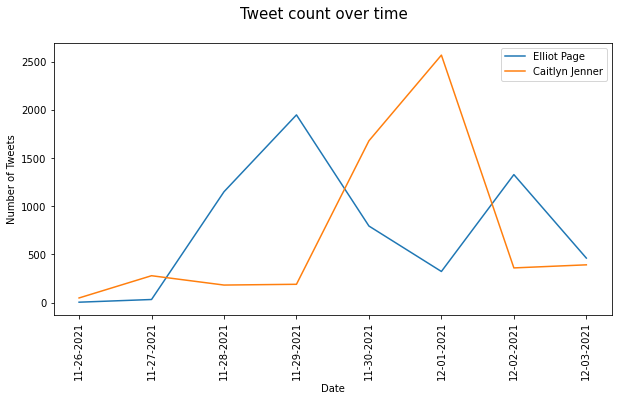

In [6]:
plot = attention_plots([query1_7, query2_7], query_labels=[query1_label, query2_label],
                       xlabel="day", plot_type="line")

### 30-Day Search: Names and Deadnames

We can get an idea of how much these two celebrities' gender identities are respected by looking at how many times they are referenced by their "deadname." A deadname is the birth name that a transgender person drops when they transition, often in favor of a name that fits their gender identity. We can use the `search_30()` function to get an idea about how Elliot and Caitlyn are viewed in the public eye and whether their gender identities are respected by looking to see how often they've been deadnamed in the past month.

In [14]:
# running and timing the search_30 function for Elliot Page 
start = time.time()
query1_30 = search_30('"ellen page"', max_results=2000, write_csv=True)
end = time.time()

print(f"Time taken: {round((end-start)/60, 2)} min")
print(f'{query1_label} has been deadnamed {len(query1_30)} times')
query1_30.head()

Time taken: 0.15 min
Elliot Page has been deadnamed 655 times


,text,attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,in_reply_to_user_id,lang,referenced_tweets,followers_count,verified,entities_hashtags,retweet_count,reply_count,like_count,quote_count,total_engagements
Tweet ID,,,,,,,,,,,,,,,,,,,
1466833062235234309,@MammaBearinTx @Kaui_AhSingGray @MegaSausageHe...,None,2197138706,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1466048000493510668,2021-12-03 18:13:49+00:00,"{'annotations': [{'start': 78, 'end': 89, 'pro...",None,822854937709256704,en,"[(type, id)]",28,False,None,0,0,0,0,0
1466831597479550988,@TheSpanishDrunk @chrisdcomedy I’m assuming yo...,None,2759817286,None,1466826861812453376,2021-12-03 18:07:59+00:00,"{'annotations': [{'start': 75, 'end': 79, 'pro...",None,464358304,en,"[(type, id)]",48,False,None,0,0,0,0,0
1466824164069842951,RT @Iamthisnotthat1: And it began from the ver...,None,1223731868668977157,None,1466824164069842951,2021-12-03 17:38:27+00:00,"{'mentions': [{'start': 3, 'end': 19, 'usernam...",None,None,en,"[(type, id)]",673,False,None,23,0,0,0,23
1466820775130943491,RT @Iamthisnotthat1: And it began from the ver...,None,1407735968979996674,None,1466820775130943491,2021-12-03 17:24:59+00:00,"{'mentions': [{'start': 3, 'end': 19, 'usernam...",None,None,en,"[(type, id)]",96,False,None,23,0,0,0,23
1466818341071376387,I just had a star in a horror film with Ellen ...,None,3916027273,None,1466818341071376387,2021-12-03 17:15:19+00:00,"{'annotations': [{'start': 40, 'end': 49, 'pro...",None,None,en,None,1619,False,None,0,0,0,0,0


In [15]:
# running and timing the search_30 function for Caitlyn Jenner 
start = time.time()
query2_30 = search_30('"bruce jenner"', max_results=2000, write_csv=True)
end = time.time()

print(f"Time taken: {round((end-start)/60, 2)} min")
print(f'{query2_label} has been deadnamed {len(query2_30)} times')
query2_30.head()

Time taken: 0.51 min
Caitlyn Jenner has been deadnamed 2000 times


,text,attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,in_reply_to_user_id,lang,referenced_tweets,followers_count,verified,entities_hashtags,retweet_count,reply_count,like_count,quote_count,total_engagements
Tweet ID,,,,,,,,,,,,,,,,,,,
1466833672192077835,Imagine if General Patton gave an update on Am...,None,1132738710,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1466833672192077835,2021-12-03 18:16:14+00:00,"{'annotations': [{'start': 11, 'end': 24, 'pro...",None,None,en,None,6163,False,None,0,0,0,0,0
1466833062235234309,@MammaBearinTx @Kaui_AhSingGray @MegaSausageHe...,None,2197138706,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1466048000493510668,2021-12-03 18:13:49+00:00,"{'mentions': [{'start': 0, 'end': 14, 'usernam...",None,822854937709256704,en,"[(type, id)]",28,False,None,0,0,0,0,0
1466830231864500225,@FamilyGuyonFOX Family Guy knew Bruce Jenner w...,None,1466475903328960520,"[{'domain': {'id': '3', 'name': 'TV Shows', 'd...",1466830231864500225,2021-12-03 18:02:34+00:00,"{'mentions': [{'start': 0, 'end': 15, 'usernam...",None,32625314,en,None,0,False,None,0,0,0,0,0
1466828023957798913,@USAVet2003 It's still hard for me to wrap my ...,{'media_keys': ['7_1466827988113268741']},601397997,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1466822162573049860,2021-12-03 17:53:47+00:00,"{'mentions': [{'start': 0, 'end': 11, 'usernam...",None,1388599919083143170,en,"[(type, id)]",3562,False,None,0,0,1,0,1
1466827301405011975,@ebonybowden Reminds me of when Bruce Jenner k...,None,718227844,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1466816319022673932,2021-12-03 17:50:55+00:00,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",None,100390281,en,"[(type, id)]",34,False,None,0,0,0,0,0


In the past month, Elliot Page has been deadnamed a little over 650 times, and Caitlyn Jenner has been deadnamed 2,000 times or more (keep in mind that both of them have been mentioned over 2,000 times in the past week alone). From this, we can see that people on social media respect Elliot Page's identity much more than Caitlyn Jenner's, even though Elliot Page has been out as transgender for a shorter time frame. From the sample tweets that we displayed above, it seems like many of the tweets are openly disrespecting Caitlyn's gender identity, sometimes as a way to criticize her character or past actions. This large difference illuminates what could be a key difference in these celebrities' reputations: Caitlyn was around 60 years old when she came out, and had a long-established history as an Olympic athlete and a part of the Kardashian family. She's also been embroiled in multiple controversies, and is disliked by many people online. Elliot Page, on the other hand, is in his early 30's, and was already established and adored as an LGBTQ+ actor before he came out of the closet. The public reactions to these celebrities coming out and the extent to which people on social media respect their gender identities may differ in a large part due to the audiences that they have gathered over their careers, as well as their overall reputation in the public eye (although gender identity should be respected for everyone, regardless of one's character or career path).

### Full Archive Search: Word Clouds

Let's take a look at the public reaction when Caitlyn and Elliot came out of the closet. Both of these celebrities have been out for quite a while now, so we'll have to use the `search_full()` function to reach further back in the Twitter archive and retrieve Tweets on the specific days around each celebrities' public coming out. Then, we'll pass those responses into the `word_cloud()` function in order to see some common words and hashtags that were used when people talked about them on Twitter. We first have to define the date ranges we want to search the Twitter archives for, so we'll define the dates that each celebrity came out and then retrieve Tweets from the subsequent week. Elliot Page came out on December 2, 2020, and Caitlyn Jenner came out on April 24, 2015. For this query, we define the `start_date` and `end_date` arguments within `search_full()`.

In [2]:
# defining date range for Elliot Page
query1_start = "12/2/2020"
query1_end = "12/9/2020"

# defining date range for Caitlyn Jenner
query2_start = "4/24/2015"
query2_end = "5/1/2015"

In [16]:
# running and timing search_full function for Elliot Page
start = time.time()
query1_full = search_full(query1, start_date=query1_start, end_date=query1_end, max_results=2000, write_csv=True)
end = time.time()

print(f"Time taken: {round((end-start)/60, 2)} min")
query1_full.head()

Time taken: 0.51 min


In [18]:
query1_full.head()

,text,attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,in_reply_to_user_id,lang,referenced_tweets,followers_count,verified,entities_hashtags,retweet_count,reply_count,like_count,quote_count,total_engagements
Tweet ID,,,,,,,,,,,,,,,,,,,
1336460108843331584,"me chamem de antiquada, mas fui criada para se...",None,3856502782,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1336460108843331584,2020-12-08 23:58:14+00:00,"{'urls': [{'start': 226, 'end': 249, 'url': 'h...",None,None,pt,"[(type, id)]",592,False,None,0,0,2,0,2
1336459666000384000,RT @agathagouveaa: elliot page = perfeição htt...,{'media_keys': ['3_1335635834863833093']},1166383696024408064,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1336459666000384000,2020-12-08 23:56:29+00:00,"{'mentions': [{'start': 3, 'end': 17, 'usernam...",None,None,pt,"[(type, id)]",206,False,None,6803,0,0,0,6803
1336459491236311040,E o Bolsonaro que foi entrevistado pelo Elliot...,{'media_keys': ['7_1336459418033123330']},1212601755696914432,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1336459491236311040,2020-12-08 23:55:47+00:00,"{'urls': [{'start': 52, 'end': 75, 'url': 'htt...",None,None,pt,None,47,False,None,0,2,0,0,2
1336459481564151810,RT @sal__morton: The cis: i would never have g...,"{'media_keys': ['3_1335605828443918342', '3_13...",907824628944515072,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1336459481564151810,2020-12-08 23:55:45+00:00,"{'urls': [{'start': 91, 'end': 114, 'url': 'ht...",None,None,en,"[(type, id)]",191,False,None,642,0,0,0,642
1336459229020958720,@shouty_person @TheElliotPage @chasestrangio E...,None,1303342030593110018,"[{'domain': {'id': '10', 'name': 'Person', 'de...",1334208420551987204,2020-12-08 23:54:45+00:00,"{'mentions': [{'start': 0, 'end': 14, 'usernam...",None,1123626042021875713,en,"[(type, id)]",2,False,None,0,0,2,0,2


[nltk_data] Downloading package punkt to /home/lana-e/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


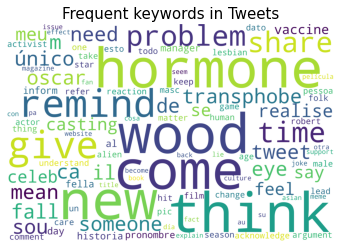

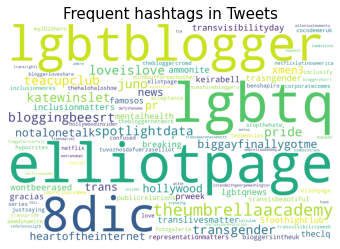

Time taken: 0.22 min


In [19]:
# creating a wordcloud from Tweets about Elliot Page
start = time.time()
wordcloud, hashtags = word_cloud(query1_full, query=query1, save_imgs=True)
end = time.time()

print(f"Time taken: {round((end-start)/60, 2)} min")

In [20]:
# running and timing search_full function for Caitlyn Jenner
start = time.time()
query2_full = search_full(query2, start_date=query2_start, end_date=query2_end, max_results=2000, write_csv=True)
end = time.time()

print(f"Time taken: {round((end-start)/60, 2)} min")
query2_full.head()

Time taken: 0.46 min


,text,attachments,author_id,context_annotations,conversation_id,created_at,entities,geo,in_reply_to_user_id,lang,referenced_tweets,followers_count,verified,entities_hashtags,retweet_count,reply_count,like_count,quote_count,total_engagements
Tweet ID,,,,,,,,,,,,,,,,,,,
593927790707146752,RT @charisma_news: What you need to know about...,None,1373628060,None,593927790707146752,2015-04-30 23:59:54+00:00,"{'hashtags': [{'start': 47, 'end': 58, 'tag': ...",None,None,en,"[(type, id)]",2367,False,"[BrueJenner, Bible, Transgender, debate, gende...",2,0,0,0,2
593927751624691713,Temas del dia: Wheaties Cereal Speaks Out On B...,{'media_keys': ['3_593927751549214720']},159642266,None,593927751624691713,2015-04-30 23:59:45+00:00,"{'urls': [{'start': 117, 'end': 139, 'url': 'h...",None,None,en,None,1548,False,None,0,0,0,0,0
593927717130756096,"RT @LadyCasa305: ""Have an open mind and an ope...",None,1122010518,None,593927717130756096,2015-04-30 23:59:37+00:00,"{'mentions': [{'start': 3, 'end': 15, 'usernam...",None,None,en,"[(type, id)]",116,False,None,21,0,0,0,21
593927659815641088,"Lily Tomlin, Tennessee School Applaud Bruce Je...",None,2997117148,None,593927659815641088,2015-04-30 23:59:23+00:00,"{'annotations': [{'start': 0, 'end': 10, 'prob...",None,None,en,None,19,False,None,0,0,0,0,0
593927510158483456,RT @Tmoney68: The real winner in the Bruce Jen...,None,409679865,None,593927510158483456,2015-04-30 23:58:47+00:00,"{'mentions': [{'start': 3, 'end': 12, 'usernam...",None,None,en,"[(type, id)]",20024,False,None,384,0,0,0,384


[nltk_data] Downloading package punkt to /home/lana-e/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


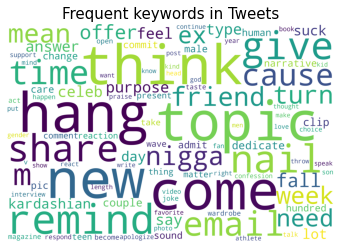

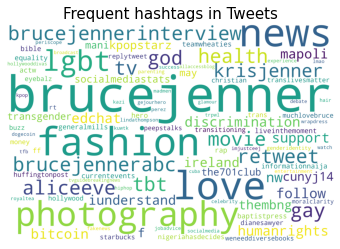

Time taken: 0.22 min


In [21]:
# creating a wordcloud from Tweets about Caitlyn Jenner
start = time.time()
wordcloud, hashtags = word_cloud(query2_full, query=query2, save_imgs=True)
end = time.time()

print(f"Time taken: {round((end-start)/60, 2)} min")